In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from scipy.stats import probplot
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [4]:
sns.set()

In [5]:
pd.set_option('display.max_columns',None)

# 1.Data Import

In [6]:
housing = pd.read_csv('./train.csv')

In [7]:
housing.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
rows,columns = housing.shape
print(housing.shape)

(1460, 81)


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [10]:
# setting index as id
housing.set_index('Id',inplace = True)

# data exploration and data correction

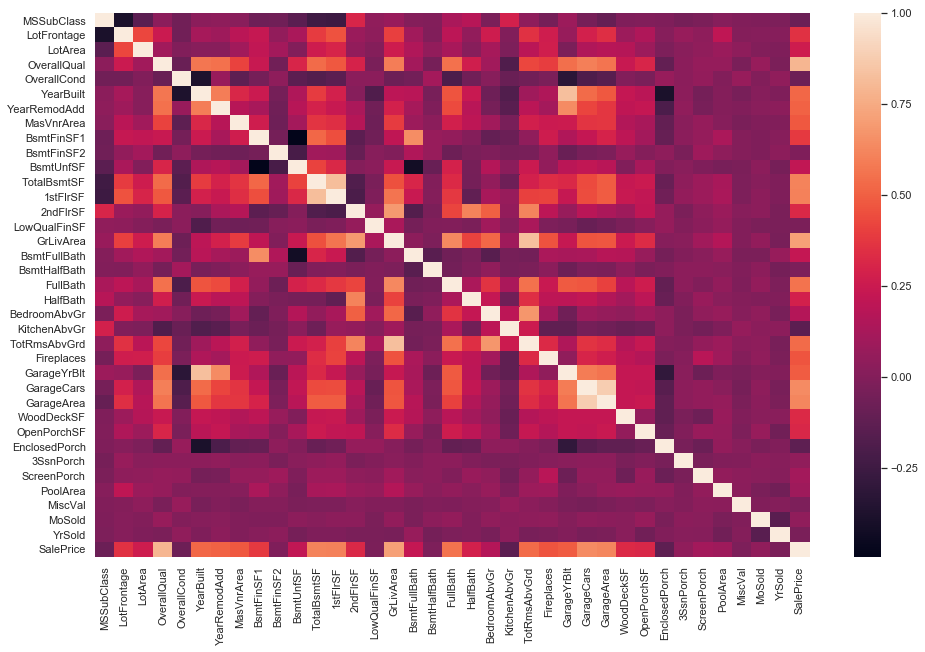

In [11]:
plt.figure(figsize = (16,10))
sns.heatmap(housing.corr())
plt.show()

from the above heatmap we can see that some features like overallqual,totalbsmtsf,1stflrsf,grlivarea,fullbath,garagecars,garagearea
are higly correlated with saleprice. There are also other correlations which are present between the features

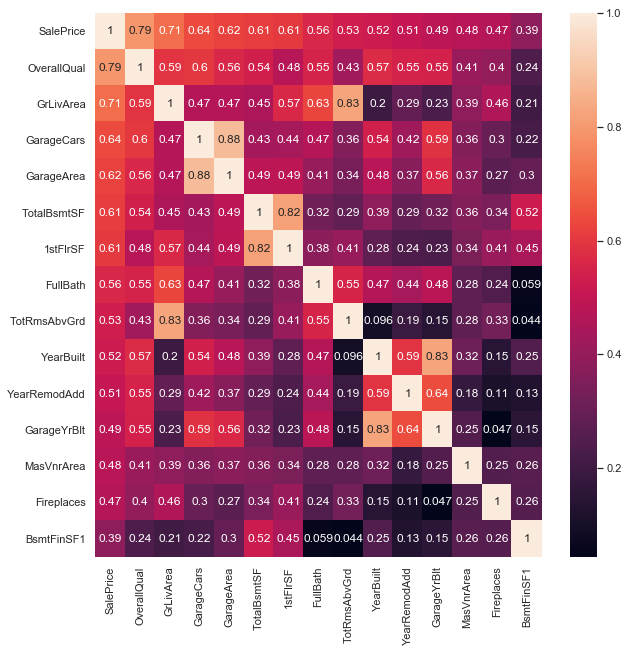

In [12]:
# plotting 15 variables which are highly correlated with SaleProce
plt.figure(figsize = (10,10))
sns.heatmap(housing[housing.corr().nlargest(15,'SalePrice').index].corr(),annot = True)
plt.show()

## Null value check

In [13]:
nullvalues1 = round(100*housing.isnull().sum()/len(housing),2)

In [14]:
print(nullvalues1[nullvalues1>0].sort_values(ascending = False))

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64


In [15]:
housing.loc[pd.isnull(housing.PoolQC),'PoolArea'].unique()

array([0])

We can see that PoolQC has 99.52% of Null values which means that the corresponding house has no pool and this information is captured by the variable poolArea, which seems to be 0 when ever the PoolQC is null.Hence we can safely drop this column. The same goes with column MiscFeatures whose information is carried by MiscVal.

In [16]:
housing.drop(['PoolQC','MiscFeature'],axis = 1,inplace = True)

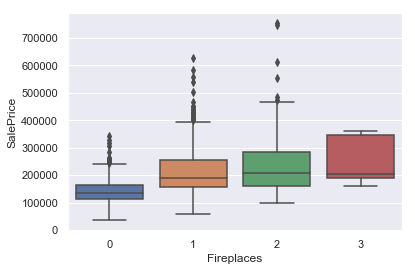

In [17]:
data=housing.copy()
sns.boxplot(y='SalePrice',x='Fireplaces',data = data)
plt.show()

In [18]:
data = housing.copy()

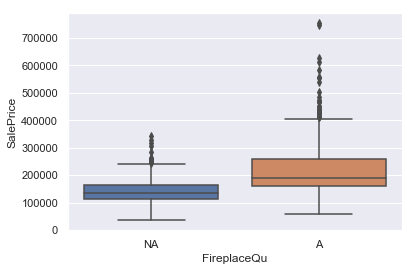

In [19]:
data.FireplaceQu = data.FireplaceQu.replace(np.nan,'NA')
data.loc[data.FireplaceQu != 'NA','FireplaceQu'] = 'A'
sns.boxplot(y='SalePrice',x='FireplaceQu',data = data)
plt.show()

from the above plots we can see that the having fireplace increases the price of the house which is captured by the fireplaces variable,hence FireplaceQu can be dropped

In [20]:
housing.drop('FireplaceQu',axis = 1,inplace = True)

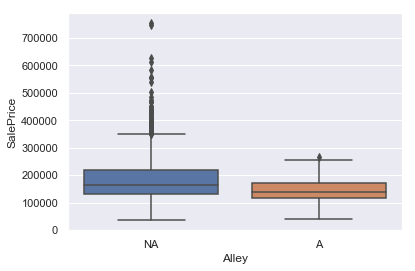

In [21]:
data = housing.copy()
data.Alley = data.Alley.replace(np.nan,'NA')
data.loc[data.Alley != 'NA','Alley'] = 'A'
sns.boxplot(y = 'SalePrice',x = 'Alley',data = data)
plt.show()

We can see that having an alley and not having a alley doesnt really affect the price by much. Hence this column can be dropped safely

In [22]:
housing.drop(['Alley'],axis = 1,inplace = True)

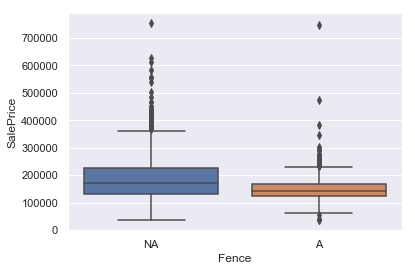

In [23]:
data = housing.copy()
data.Fence = data.Fence.replace(np.nan,'NA')
data.loc[data.Fence != 'NA','Fence'] = 'A'
sns.boxplot(y = 'SalePrice',x = 'Fence',data = data)
plt.show()

Having fence or not having fence doesnt really affect the price of the house. hence we can drop the column

In [24]:
housing.drop('Fence',axis = 1,inplace = True)

LotFrontage can be imputed based on the neighbourhood, as the houses in the same neigborhood will have similat lorfrontage

In [25]:
housing.LotFrontage = housing.groupby('Neighborhood').LotFrontage.apply(lambda x:x.fillna(x.median()))

As we have seen above GarageBuiltYr has high correlation with buildyear, therefore this column can be dropped

In [26]:
housing.drop('GarageYrBlt',axis = 1,inplace = True)

## Garage variables

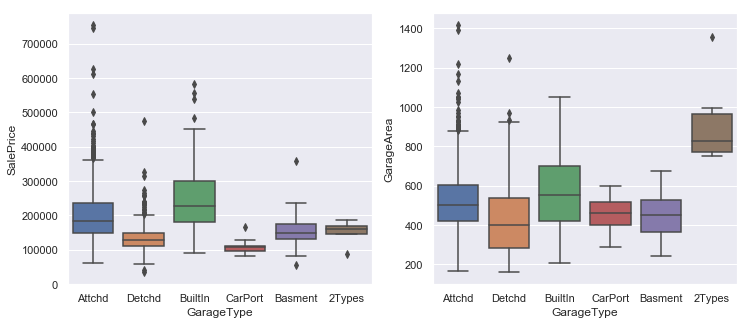

In [27]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y='SalePrice',x='GarageType',data = housing)
plt.subplot(1,2,2)
sns.boxplot(y='GarageArea',x='GarageType',data = housing)
plt.show()

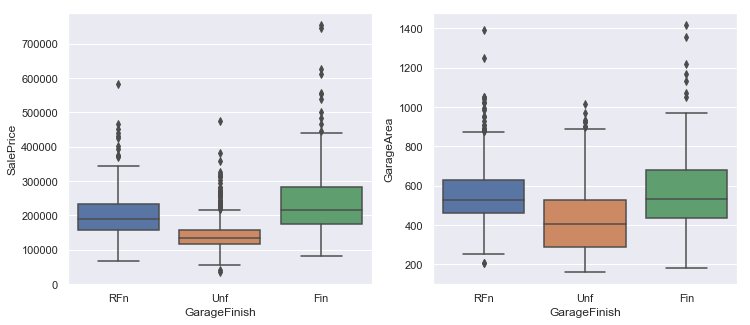

In [28]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y='SalePrice',x='GarageFinish',data = housing)
plt.subplot(1,2,2)
sns.boxplot(y='GarageArea',x='GarageFinish',data = housing)
plt.show()

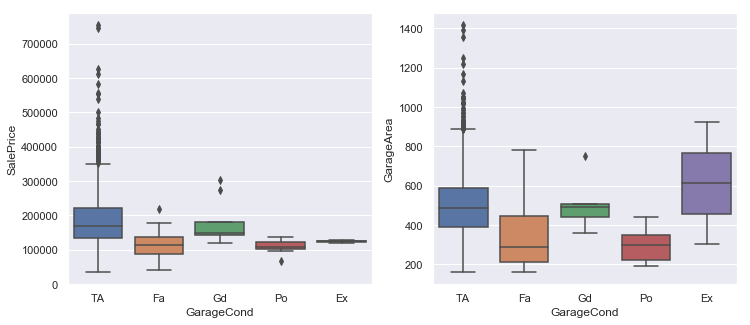

In [29]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y='SalePrice',x='GarageCond',data = housing)
plt.subplot(1,2,2)
sns.boxplot(y='GarageArea',x='GarageCond',data = housing)
plt.show()

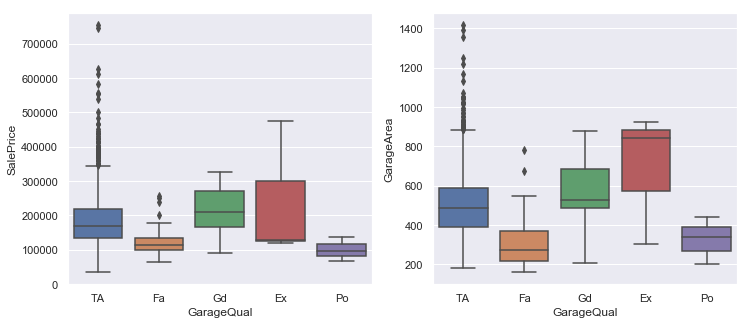

In [30]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y='SalePrice',x='GarageQual',data = housing)
plt.subplot(1,2,2)
sns.boxplot(y='GarageArea',x='GarageQual',data = housing)
plt.show()

We have seen that the garagearea is highly correlated with the price and all the other garage variables seems to have same trend on both garage area and saleprice. Therefore it is safe to assume that the major variation in saleprice is due to the garagearea

In [31]:
# We have seen that garage area is highly correlated with the SalePrice and each of the garage variables is correlated with
#housing.drop(['GarageType','GarageQual','GarageCond','GarageFinish'],axis = 1,inplace = True)

## Basement variables

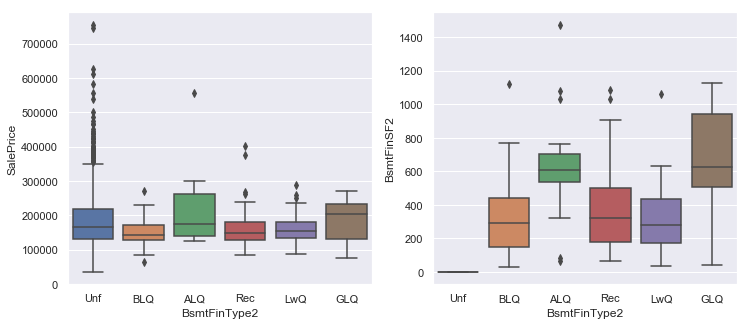

In [32]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y='SalePrice',x='BsmtFinType2',data = housing)
plt.subplot(1,2,2)
sns.boxplot(y='BsmtFinSF2',x='BsmtFinType2',data = housing)
plt.show()

No huge variation in saleprice with Bsmtfintype2. Filling the nan values with 'NA'

In [33]:
housing.BsmtFinType2 = housing.BsmtFinType2.replace(np.nan,'NA') 

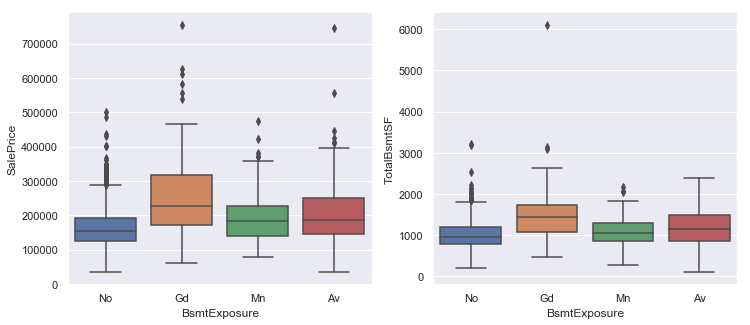

In [34]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y='SalePrice',x='BsmtExposure',data = housing)
plt.subplot(1,2,2)
sns.boxplot(y='TotalBsmtSF',x='BsmtExposure',data = housing)
plt.show()

We can see that the exposure vs basement SF and saleprive vs BasmtExposure follow same trend therefore the variation in Saleprice may not be due to bsmt exposure.

In [35]:
housing.BsmtExposure = housing.BsmtExposure.replace(np.nan,'NA')

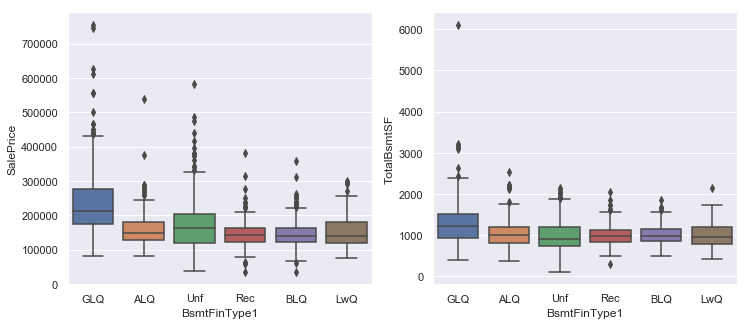

In [36]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y='SalePrice',x='BsmtFinType1',data = housing)
plt.subplot(1,2,2)
sns.boxplot(y='TotalBsmtSF',x='BsmtFinType1',data = housing)
plt.show()

It follows more or the same trend as the bsmt exposure

In [37]:
housing.BsmtFinType1 = housing.BsmtFinType1.replace(np.nan,'NA') 

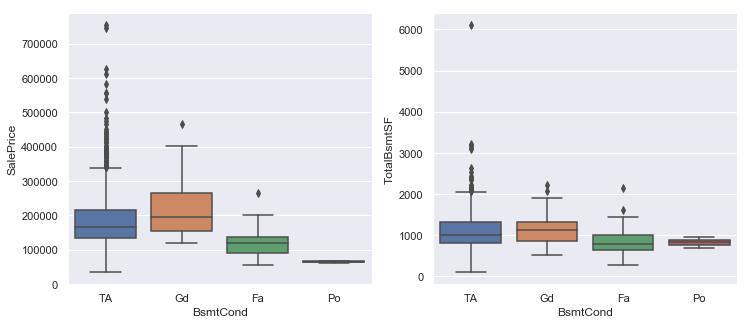

In [38]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y='SalePrice',x='BsmtCond',data = housing)
plt.subplot(1,2,2)
sns.boxplot(y='TotalBsmtSF',x='BsmtCond',data = housing)
plt.show()

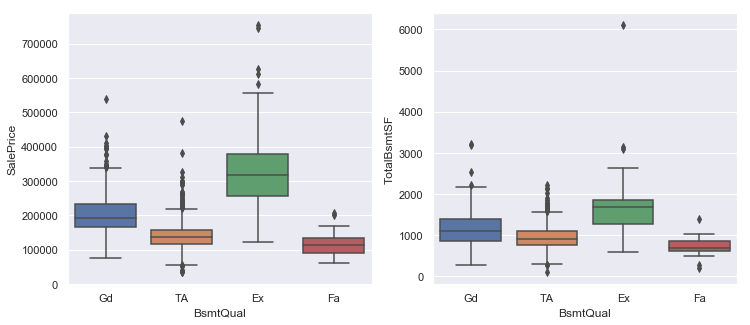

In [39]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y='SalePrice',x='BsmtQual',data = housing)
plt.subplot(1,2,2)
sns.boxplot(y='TotalBsmtSF',x='BsmtQual',data = housing)
plt.show()

The same trend is observed in bsmtqual and Bsmt cond as well

In [40]:
housing.BsmtCond = housing.BsmtCond.replace(np.nan,'NA') 
housing.BsmtQual = housing.BsmtQual.replace(np.nan,'NA') 

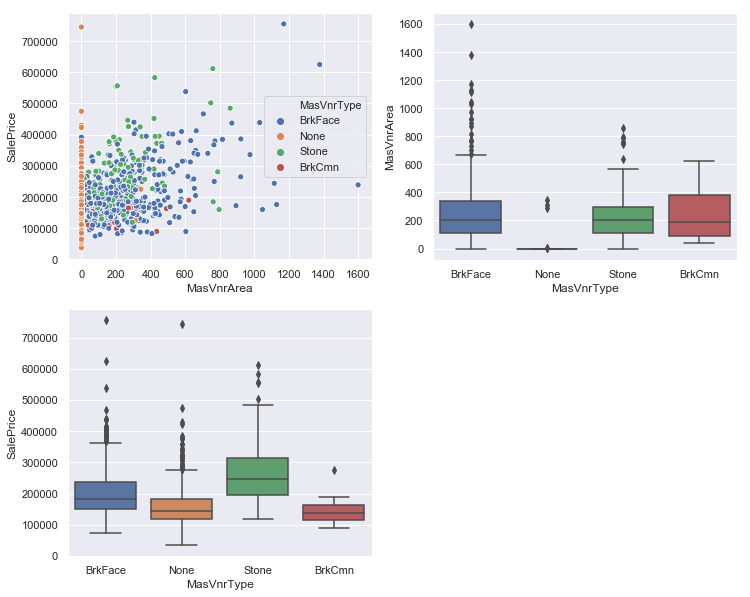

In [41]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.scatterplot(y='SalePrice',x='MasVnrArea',hue = 'MasVnrType',data = housing)
plt.subplot(2,2,2)
sns.boxplot(y='MasVnrArea',x='MasVnrType',data = housing)
plt.subplot(2,2,3)
sns.boxplot(y='SalePrice',x='MasVnrType',data = housing)
plt.show()


In [42]:
#MasVnrType
housing[housing.MasVnrArea == 0]['MasVnrType'].value_counts()
#housing.MasVnrType.value_counts()

None       859
Stone        1
BrkFace      1
Name: MasVnrType, dtype: int64

In [43]:
housing.MasVnrType = housing.MasVnrType.replace(np.nan,'None') 

In [44]:
housing.MasVnrArea = housing.MasVnrArea.replace(np.nan,0) 

In [45]:
housing.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

The majority of values are SBrkr.Therefore filling the one null value with Sbrkr

In [46]:
housing.Electrical = housing.Electrical.replace(np.nan,'SBrkr')

In [47]:
# No null values are present
housing.isnull().sum().sum()

324

### Converting the ordered categorical values into numeric using encoding

In [48]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 74 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 no

In [49]:
housing.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [50]:
#All most of the values are AllPub, utilities feature is dropped
housing.drop('Utilities',axis = 1,inplace = True)

In [51]:
housing.Street = housing.Street.map({'Pave':1,'Grvl':0})
housing.LotShape = housing.LotShape.map({'Reg':3,'IR1':2,'IR2':1,'IR3':0})
housing.LandContour = housing.LandContour.map({'Lvl':3,'Bnk':2,'HLS':1,'Low':0})
housing.LandSlope = housing.LandSlope.map({'Gtl':2,'Mod':1,'Sev':0})
for feature in ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual']:
    housing[feature] = housing[feature].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'No':0})
housing.BsmtExposure = housing.BsmtExposure.map({'Gd':3,'Av':2,'Mn':1,'NA':0,'No':0}) 
for feature in ['BsmtFinType1','BsmtFinType2']:
    housing[feature] = housing[feature].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
housing.CentralAir = housing.CentralAir.map({'Y':1,'N':0})
housing.Functional = housing.Functional.map({'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,'Maj2':2,'Sev':1,'Sal':0})
housing.PavedDrive = housing.PavedDrive.map({'Y':2,'P':1,'N':0})

In [52]:
housing.MSSubClass = housing.MSSubClass.astype('object')

In [53]:
housing['Age'] = housing['YrSold'] - housing['YearBuilt']
housing['RemodAge'] = housing['YrSold'] - housing['YearRemodAdd']

In [54]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 75 columns):
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null int64
LotShape         1460 non-null int64
LandContour      1460 non-null int64
LotConfig        1460 non-null object
LandSlope        1460 non-null int64
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
MasVnrArea       1460 non-n

In [55]:
corr = housing.corr()

In [56]:
corr = corr.apply(lambda x:abs(x))

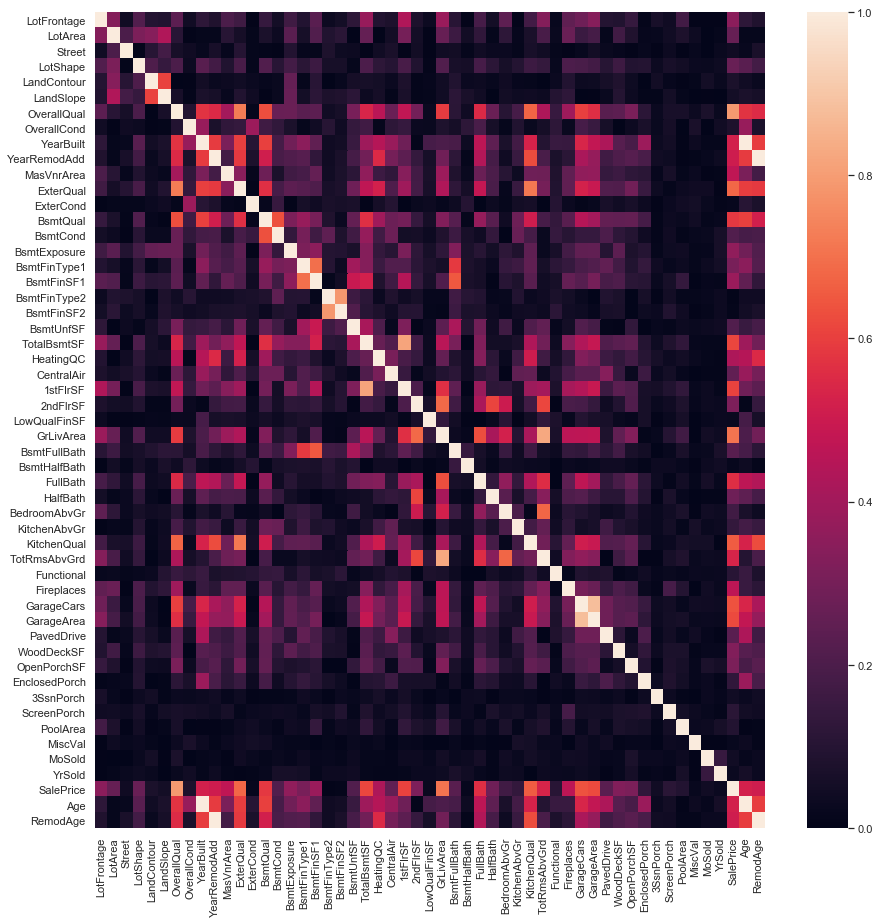

In [57]:
plt.figure(figsize=(15,15))
sns.heatmap(corr)
plt.show()

we can see that there are some correlated features available, hence dropping such features.
- All the quality variables are higly correlated with the OverallQuality variable
- BsmtFintype variable are correlated with the corresponding area variables
- TotRmsAbvGrd is highly correlated with GrLivArea which makes sense because more the area more the rooms
- Garage Area and GarageCars are higly correlated therefore dropping GarageCars
- All the garage variables are correalted with the GarageArea, which was also seen above while handling missing values
- Age variable is derived from the year variables and Remodage is highly correlated with the age

In [58]:
housing.drop(['LotFrontage','LandContour','ExterQual','BsmtQual','KitchenQual','BsmtFinType1','BsmtFinType2','TotRmsAbvGrd','GarageCars','RemodAge','1stFlrSF'],axis = 1,inplace = True)
housing.drop(['GarageType','GarageQual','GarageCond','GarageFinish'],axis = 1,inplace = True)
housing.drop(['YearBuilt','YrSold','YearRemodAdd','MoSold'],axis =1,inplace = True)

##  EDA

lets examine the variable of interest SalePrice and the top variable which are higly correalted with it

<Figure size 1080x1080 with 0 Axes>

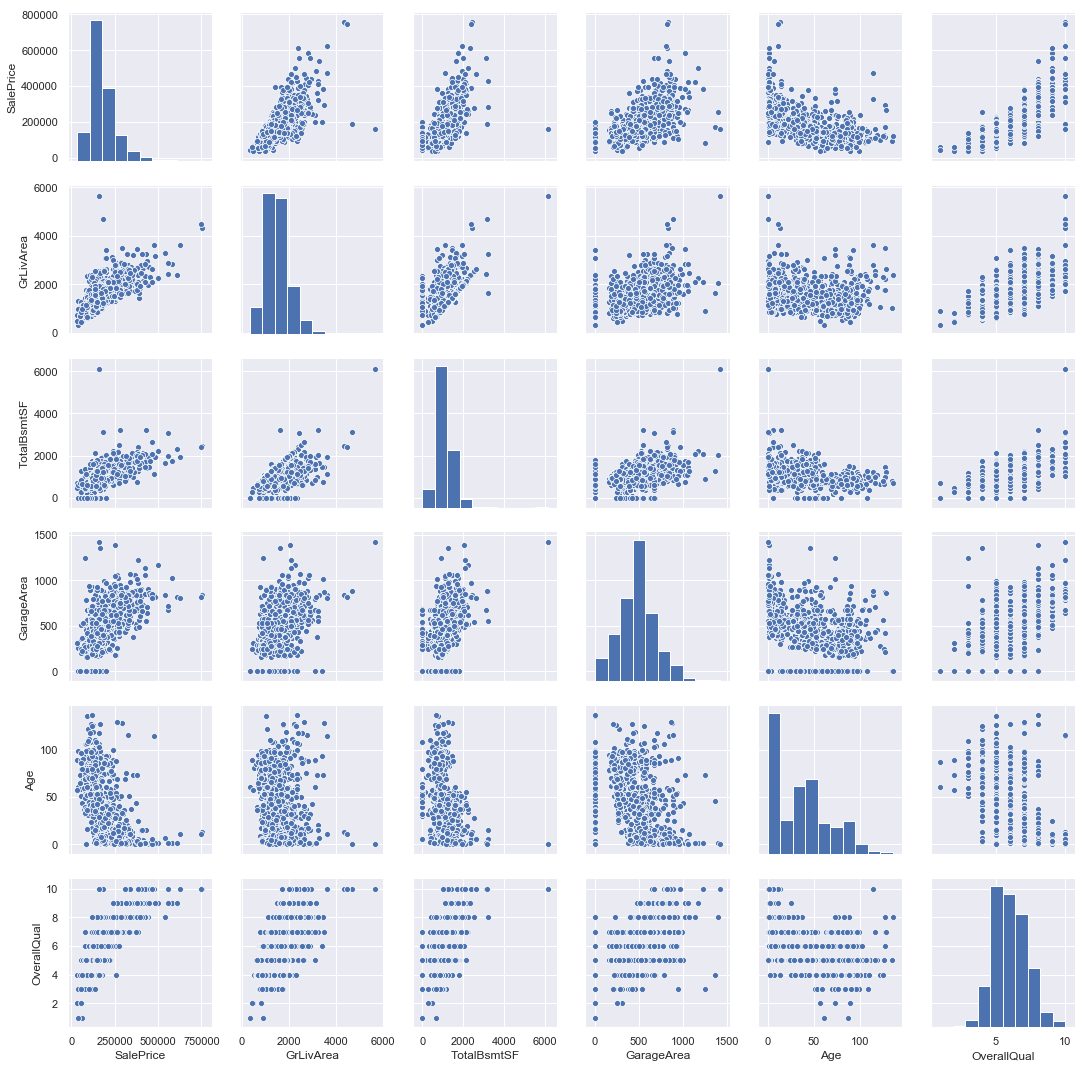

In [59]:
plot_cols = ['SalePrice','GrLivArea','TotalBsmtSF','GarageArea','Age','OverallQual']
plt.figure(figsize = (15,15))
sns.pairplot(housing[plot_cols])
plt.show()

## Outliers

From the above plot we can see that there are two points in SalePrice vs GrLivArea which seems to be outliers. For these two points even though the area is high the price is substantially low.There may be a reason for this but these doesnt seem to follow the trend like the other points. Therefore removing these points for now

In [60]:
housing.GrLivArea.sort_values(ascending = False)[0:2]

Id
1299    5642
524     4676
Name: GrLivArea, dtype: int64

In [61]:
housing.drop([1299,524],inplace = True)

<Figure size 1080x1080 with 0 Axes>

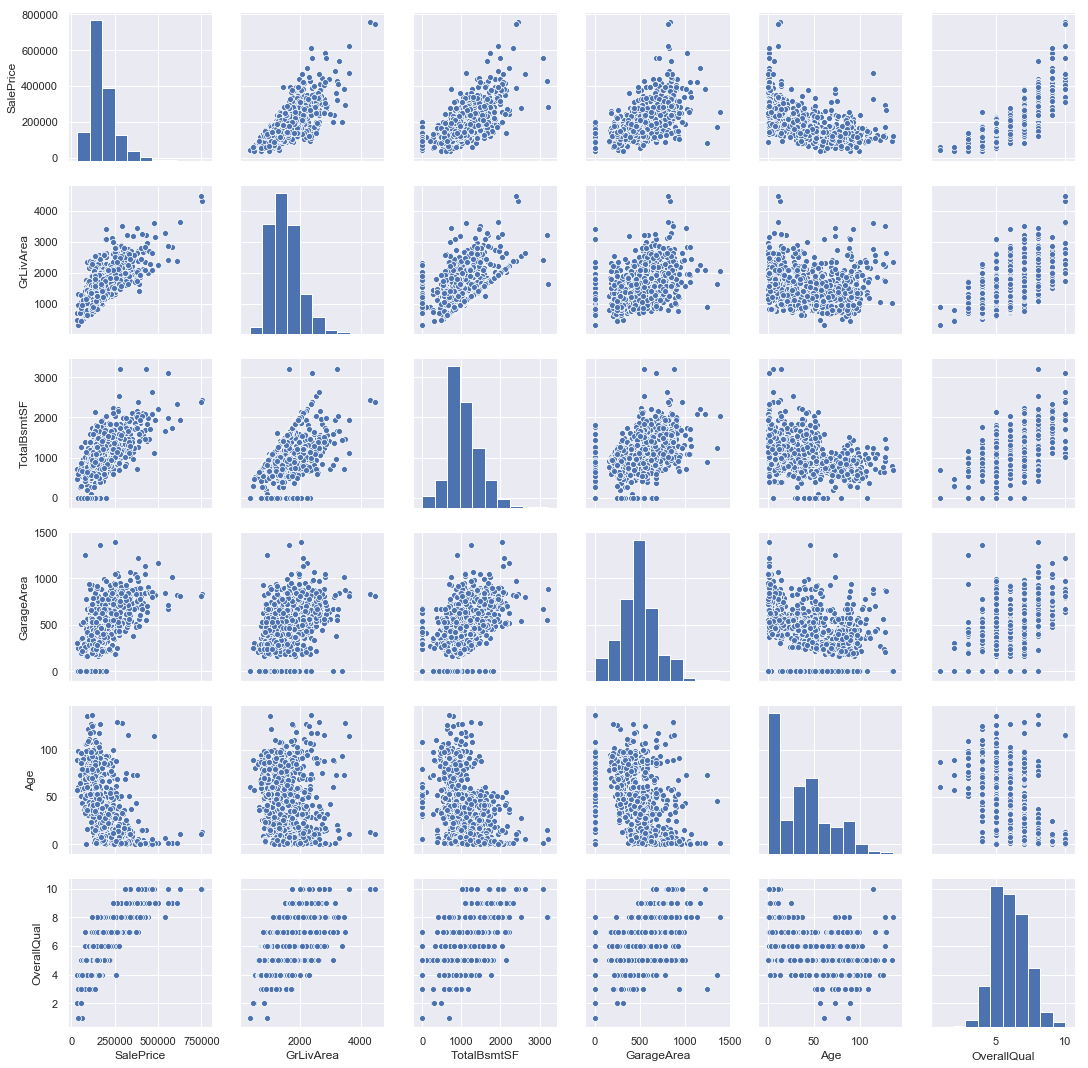

In [62]:
plot_cols = ['SalePrice','GrLivArea','TotalBsmtSF','GarageArea','Age','OverallQual']
plt.figure(figsize = (15,15))
sns.pairplot(housing[plot_cols])
plt.show()

### SalePrice

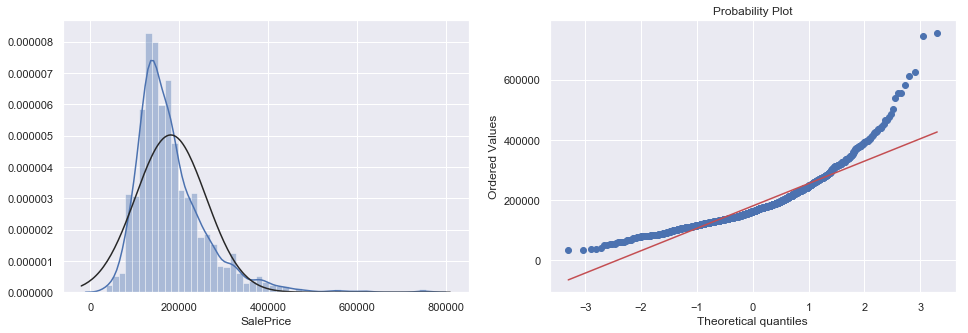

In [63]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(housing.SalePrice,fit=norm)
plt.subplot(1,2,2)
probplot(housing.SalePrice,plot = plt)
plt.show()

we can see that the SalePrice is not normal, it has peakedness and also is skewed.We can also see that the distribution doesnt fall on the red diagnoal line which represnts a normal distribution

In [64]:
print('Skewness:',housing.SalePrice.skew())
print('Kurtosis:',housing.SalePrice.kurt())

Skewness: 1.8812964895244009
Kurtosis: 6.523066888485879


In [65]:
# converting the distribution into normal by using log transformation
housing.SalePrice = np.log(housing.SalePrice)

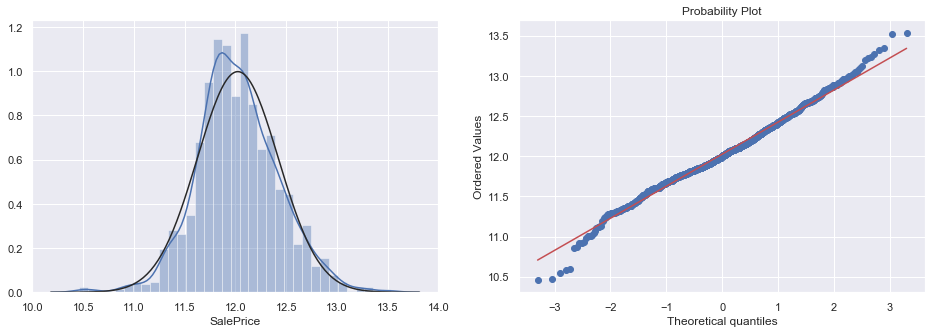

In [66]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(housing.SalePrice,fit=norm)
plt.subplot(1,2,2)
probplot(housing.SalePrice,plot = plt)
plt.show()

### Overallquality

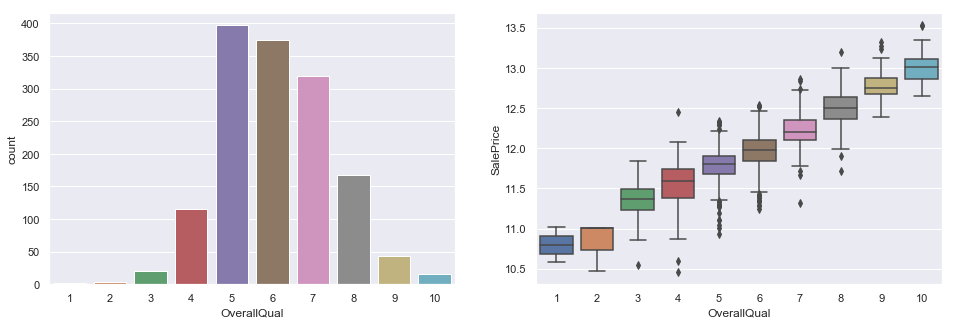

In [67]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.countplot(housing.OverallQual)
plt.subplot(1,2,2)
sns.boxplot(y='SalePrice',x='OverallQual',data = housing)
plt.show()

We can see that the price of the house increases with the increase in Overallquality

### Grlivearea

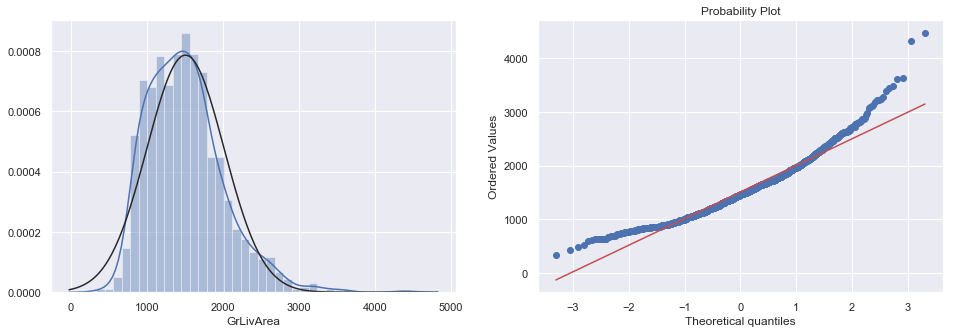

In [68]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(housing.GrLivArea,fit=norm)
plt.subplot(1,2,2)
probplot(housing.GrLivArea,plot = plt)
plt.show()

In [69]:
print('Skewness:',housing.GrLivArea.skew())
print('Kurtosis:',housing.GrLivArea.kurt())

Skewness: 1.0109917025385513
Kurtosis: 2.063463404376057


Similar to the Saleprice,hence applying log transform 

In [70]:
# converting the distribution into normal by using log transformation
housing.GrLivArea = np.log(housing.GrLivArea)

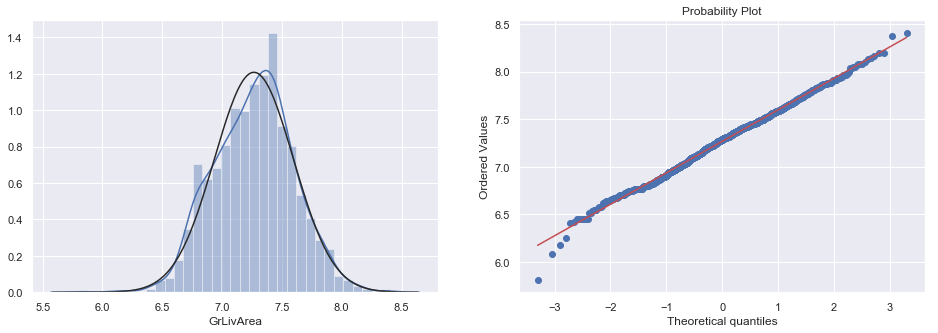

In [71]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(housing.GrLivArea,fit=norm)
plt.subplot(1,2,2)
probplot(housing.GrLivArea,plot = plt)
plt.show()

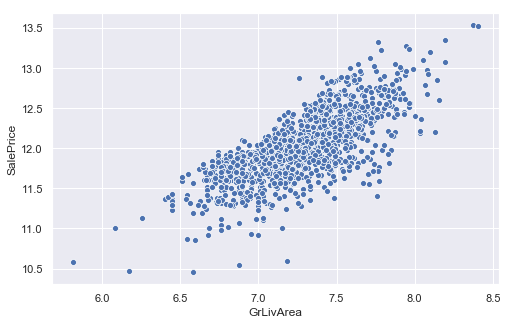

In [72]:
plt.figure(figsize = (8,5))
sns.scatterplot(y='SalePrice',x='GrLivArea',data = housing)
plt.show()

We can see a strong linear realtionship between Saleprice and GrLivArea

### GarageArea

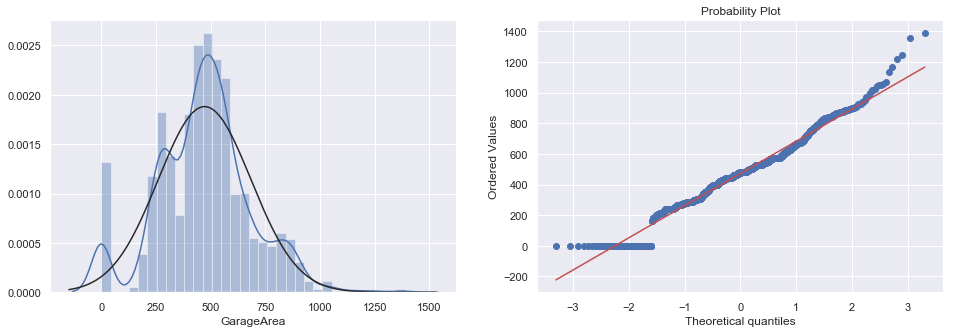

In [73]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(housing.GarageArea,fit=norm)
plt.subplot(1,2,2)
probplot(housing.GarageArea,plot = plt)
plt.show()

In [74]:
print('Skewness:',housing.GarageArea.skew())
print('Kurtosis:',housing.GarageArea.kurt())

Skewness: 0.13174798037584048
Kurtosis: 0.7612933596511593


Here in this variable GarageArea we can see that it has preakness and slightly skewed and additionally we can see that there are considerable amount of pointsat 0.This is because of the fact that some of the houses dont have garage

In [75]:
#applying log transform only to the points which are more than 0
housing.loc[housing.GarageArea >0,'GarageArea'] = np.log(housing.loc[housing.GarageArea >0,'GarageArea'] )

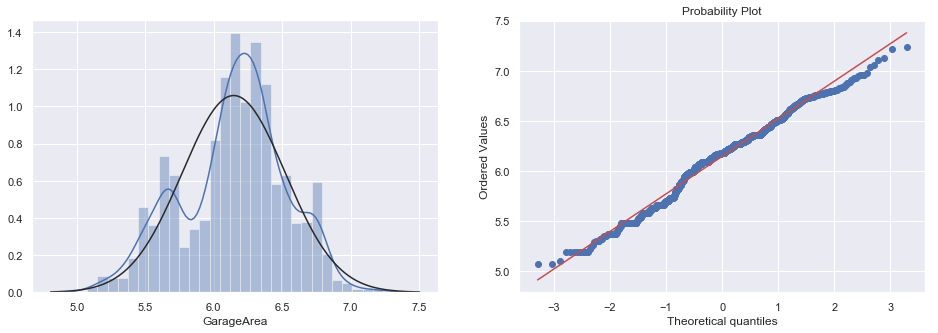

In [76]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(housing.loc[housing.GarageArea >0,'GarageArea'],fit=norm)
plt.subplot(1,2,2)
probplot(housing.loc[housing.GarageArea >0,'GarageArea'],plot = plt)
plt.show()

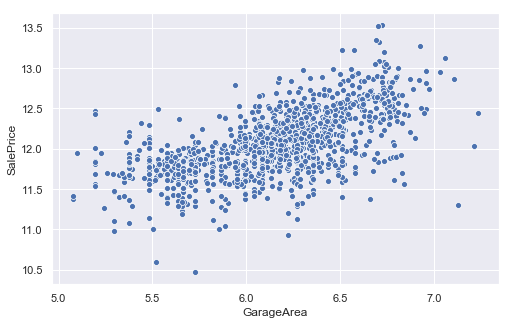

In [77]:
plt.figure(figsize = (8,5))
sns.scatterplot(y='SalePrice',x='GarageArea',data = housing[housing.GarageArea >0])
plt.show()

We can see that price increase with increase in GarageArea , but the increase appears to be slight exponential than linear

### Total Basement Area

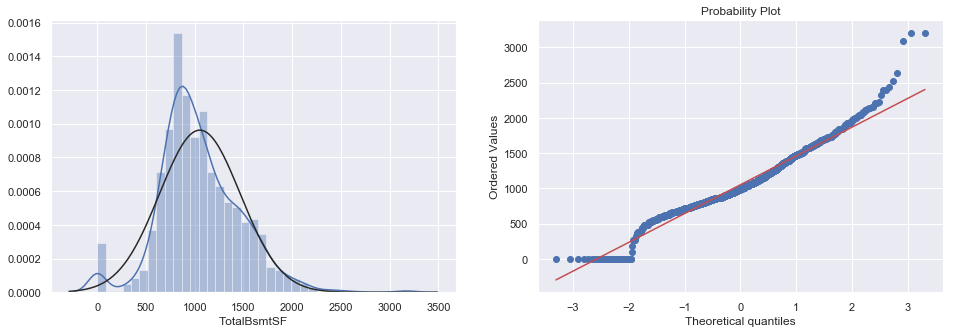

In [78]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(housing.TotalBsmtSF,fit=norm)
plt.subplot(1,2,2)
probplot(housing.TotalBsmtSF,plot = plt)
plt.show()

In [79]:
print('Skewness:',housing.TotalBsmtSF.skew())
print('Kurtosis:',housing.TotalBsmtSF.kurt())

Skewness: 0.5117033418828824
Kurtosis: 1.7701050712157982


In [80]:
#applying log transform only to the points which are more than 0
housing.loc[housing.TotalBsmtSF >0,'TotalBsmtSF'] = np.log(housing.loc[housing.TotalBsmtSF >0,'TotalBsmtSF'] )

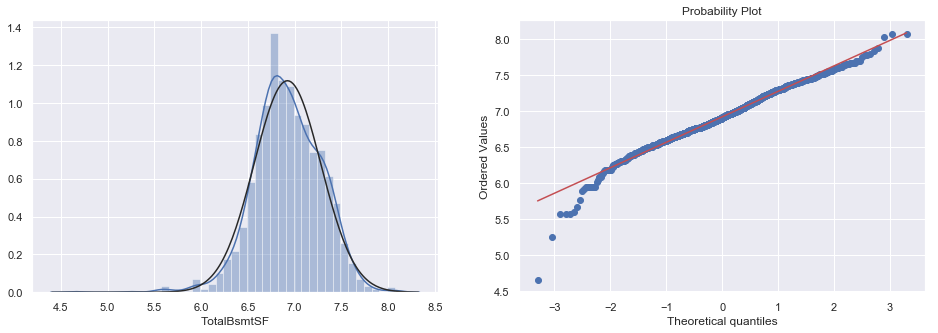

In [81]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(housing.loc[housing.TotalBsmtSF >0,'TotalBsmtSF'],fit=norm)
plt.subplot(1,2,2)
probplot(housing.loc[housing.TotalBsmtSF >0,'TotalBsmtSF'],plot = plt)
plt.show()

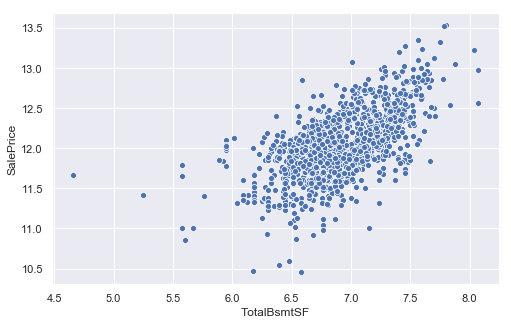

In [82]:
plt.figure(figsize = (8,5))
sns.scatterplot(y='SalePrice',x='TotalBsmtSF',data = housing[housing.TotalBsmtSF >0])
plt.show()

We can see that price increase with increase in TotalbsmtSF , but the increase is far more steeper than with the GrLivArea

### Age

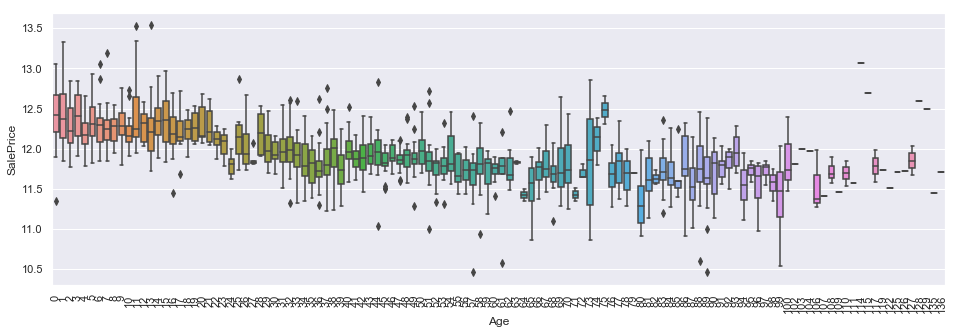

In [83]:
plt.figure(figsize = (16,5))
sns.boxplot(y='SalePrice',x='Age',data = housing)
plt.xticks(rotation = 'vertical')
plt.show()

we can see a trend of price decresing with increase in age of the building

In [84]:
cat_cols = housing.select_dtypes(include = 'object').columns.tolist()
num_cols = housing.select_dtypes(exclude = 'object').columns.tolist()

In [85]:
cat_df = housing[cat_cols].describe().T

In [86]:
cat_df['percentage'] = 100*cat_df['freq']/cat_df['count']

In [87]:
cat_df.sort_values(by='percentage',ascending = False)

,count,unique,top,freq,percentage
Condition2,1458,8,Norm,1444,99.0398
RoofMatl,1458,7,CompShg,1433,98.2853
Heating,1458,6,GasA,1426,97.8052
Electrical,1458,5,SBrkr,1333,91.4266
SaleType,1458,9,WD,1267,86.8999
Condition1,1458,9,Norm,1260,86.4198
BldgType,1458,5,1Fam,1218,83.5391
SaleCondition,1458,6,Normal,1198,82.1674
MSZoning,1458,5,RL,1149,78.8066
RoofStyle,1458,6,Gable,1141,78.2579


In [88]:
#dropping columns with more than of 90% of rows with same value
housing.drop(['Condition2','RoofMatl','Heating','Electrical'],axis = 1,inplace = True)

# Feature Scaling and Dummy Creation

In [89]:
cat_cols = housing.select_dtypes(include = 'object').columns.tolist()
num_cols = housing.select_dtypes(exclude = 'object').columns.tolist()

In [90]:
#create dummies
housing_dummies = pd.get_dummies(housing[cat_cols],drop_first = True)

In [91]:
cols = housing[num_cols].columns
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(housing[num_cols]))
df_scaled.columns = cols
df_scaled.head()

/Users/geethu/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/geethu/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterCond,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Functional,Fireplaces,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age
0,-0.203934,0.064282,0.702100,0.225879,0.658506,-0.517649,0.523937,-0.238285,0.117966,-0.630355,0.617283,-0.288867,-0.943795,0.004351,0.892277,0.264006,1.167626,-0.120325,0.539624,1.113886,-0.241236,0.793546,1.229699,0.163894,-0.211605,0.237215,-0.952231,0.345082,0.28996,-0.750831,0.225982,-0.359603,-0.11642,-0.270407,-0.063709,-0.087748,0.559804,-1.045249
1,-0.087252,0.064282,0.702100,0.225879,-0.068293,2.177825,-0.570739,-0.238285,0.117966,2.265836,1.245719,-0.288867,-0.640584,0.343550,0.892277,0.264006,-0.794354,-0.120325,-0.380198,-0.819502,3.945931,0.793546,-0.760202,0.163894,-0.211605,0.237215,0.605965,0.224741,0.28996,1.627328,-0.708304,-0.359603,-0.11642,-0.270407,-0.063709,-0.087748,0.212730,-0.185182
2,0.080162,0.064282,-1.027059,0.225879,0.658506,-0.517649,0.334044,-0.238285,0.117966,0.335042,0.108989,-0.288867,-0.301168,0.067356,0.892277,0.264006,1.195195,-0.120325,0.671287,1.113886,-0.241236,0.793546,1.229699,0.163894,-0.211605,0.237215,0.605965,0.416510,0.28996,-0.750831,-0.065025,-0.359603,-0.11642,-0.270407,-0.063709,-0.087748,0.733669,-0.979090
3,-0.092325,0.064282,-1.027059,0.225879,0.658506,-0.517649,-0.570739,-0.238285,1.928437,-0.630355,-0.514826,-0.288867,-0.061314,-0.104202,-0.150143,0.264006,0.942481,-0.120325,0.551993,1.113886,-0.241236,-1.025620,-0.760202,0.163894,-0.211605,0.237215,0.605965,0.453917,0.28996,-0.750831,-0.172238,4.089589,-0.11642,-0.270407,-0.063709,-0.087748,-0.436988,1.799589
4,0.385566,0.064282,-1.027059,0.225879,1.385305,-0.517649,1.384039,-0.238285,0.117966,1.300439,0.499451,-0.288867,-0.174452,0.258534,0.892277,0.264006,1.624809,-0.120325,1.299759,1.113886,-0.241236,0.793546,1.229699,1.389320,-0.211605,0.237215,0.605965,0.635438,0.28996,0.781406,0.578253,-0.359603,-0.11642,-0.270407,-0.063709,-0.087748,1.014088,-0.946011


In [92]:
df_scaled.shape

(1458, 38)

In [93]:
housing_dummies.shape

(1458, 120)

In [94]:
final_df = pd.concat([df_scaled,housing_dummies.reset_index()],axis = 1)

final_df.head()

,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterCond,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Functional,Fireplaces,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age,Id,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.203934,0.064282,0.702100,0.225879,0.658506,-0.517649,0.523937,-0.238285,0.117966,-0.630355,0.617283,-0.288867,-0.943795,0.004351,0.892277,0.264006,1.167626,-0.120325,0.539624,1.113886,-0.241236,0.793546,1.229699,0.163894,-0.211605,0.237215,-0.952231,0.345082,0.28996,-0.750831,0.225982,-0.359603,-0.11642,-0.270407,-0.063709,-0.087748,0.559804,-1.045249,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,-0.087252,0.064282,0.702100,0.225879,-0.068293,2.177825,-0.570739,-0.238285,0.117966,2.265836,1.245719,-0.288867,-0.640584,0.343550,0.892277,0.264006,-0.794354,-0.120325,-0.380198,-0.819502,3.945931,0.793546,-0.760202,0.163894,-0.211605,0.237215,0.605965,0.224741,0.28996,1.627328,-0.708304,-0.359603,-0.11642,-0.270407,-0.063709,-0.087748,0.212730,-0.185182,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0.080162,0.064282,-1.027059,0.225879,0.658506,-0.517649,0.334044,-0.238285,0.117966,0.335042,0.108989,-0.288867,-0.301168,0.067356,0.892277,0.264006,1.195195,-0.120325,0.671287,1.113886,-0.241236,0.793546,1.229699,0.163894,-0.211605,0.237215,0.605965,0.416510,0.2

In [95]:
final_df.set_index('Id',inplace = True)
final_df.head()

,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterCond,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Functional,Fireplaces,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-0.203934,0.064282,0.702100,0.225879,0.658506,-0.517649,0.523937,-0.238285,0.117966,-0.630355,0.617283,-0.288867,-0.943795,0.004351,0.892277,0.264006,1.167626,-0.120325,0.539624,1.113886,-0.241236,0.793546,1.229699,0.163894,-0.211605,0.237215,-0.952231,0.345082,0.28996,-0.750831,0.225982,-0.359603,-0.11642,-0.270407,-0.063709,-0.087748,0.559804,-1.045249,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,-0.087252,0.064282,0.702100,0.225879,-0.068293,2.177825,-0.570739,-0.238285,0.117966,2.265836,1.245719,-0.288867,-0.640584,0.343550,0.892277,0.264006,-0.794354,-0.120325,-0.380198,-0.819502,3.945931,0.793546,-0.760202,0.163894,-0.211605,0.237215,0.605965,0.224741,0.28996,1.627328,-0.708304,-0.359603,-0.11642,-0.270407,-0.063709,-0.087748,0.212730,-0.185182,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0.080162,0.064282,-1.027059,0.225879,0.658506,-0.517649,0.334044,-0.238285,0.117966,0.335042,0.108989,-0.2888

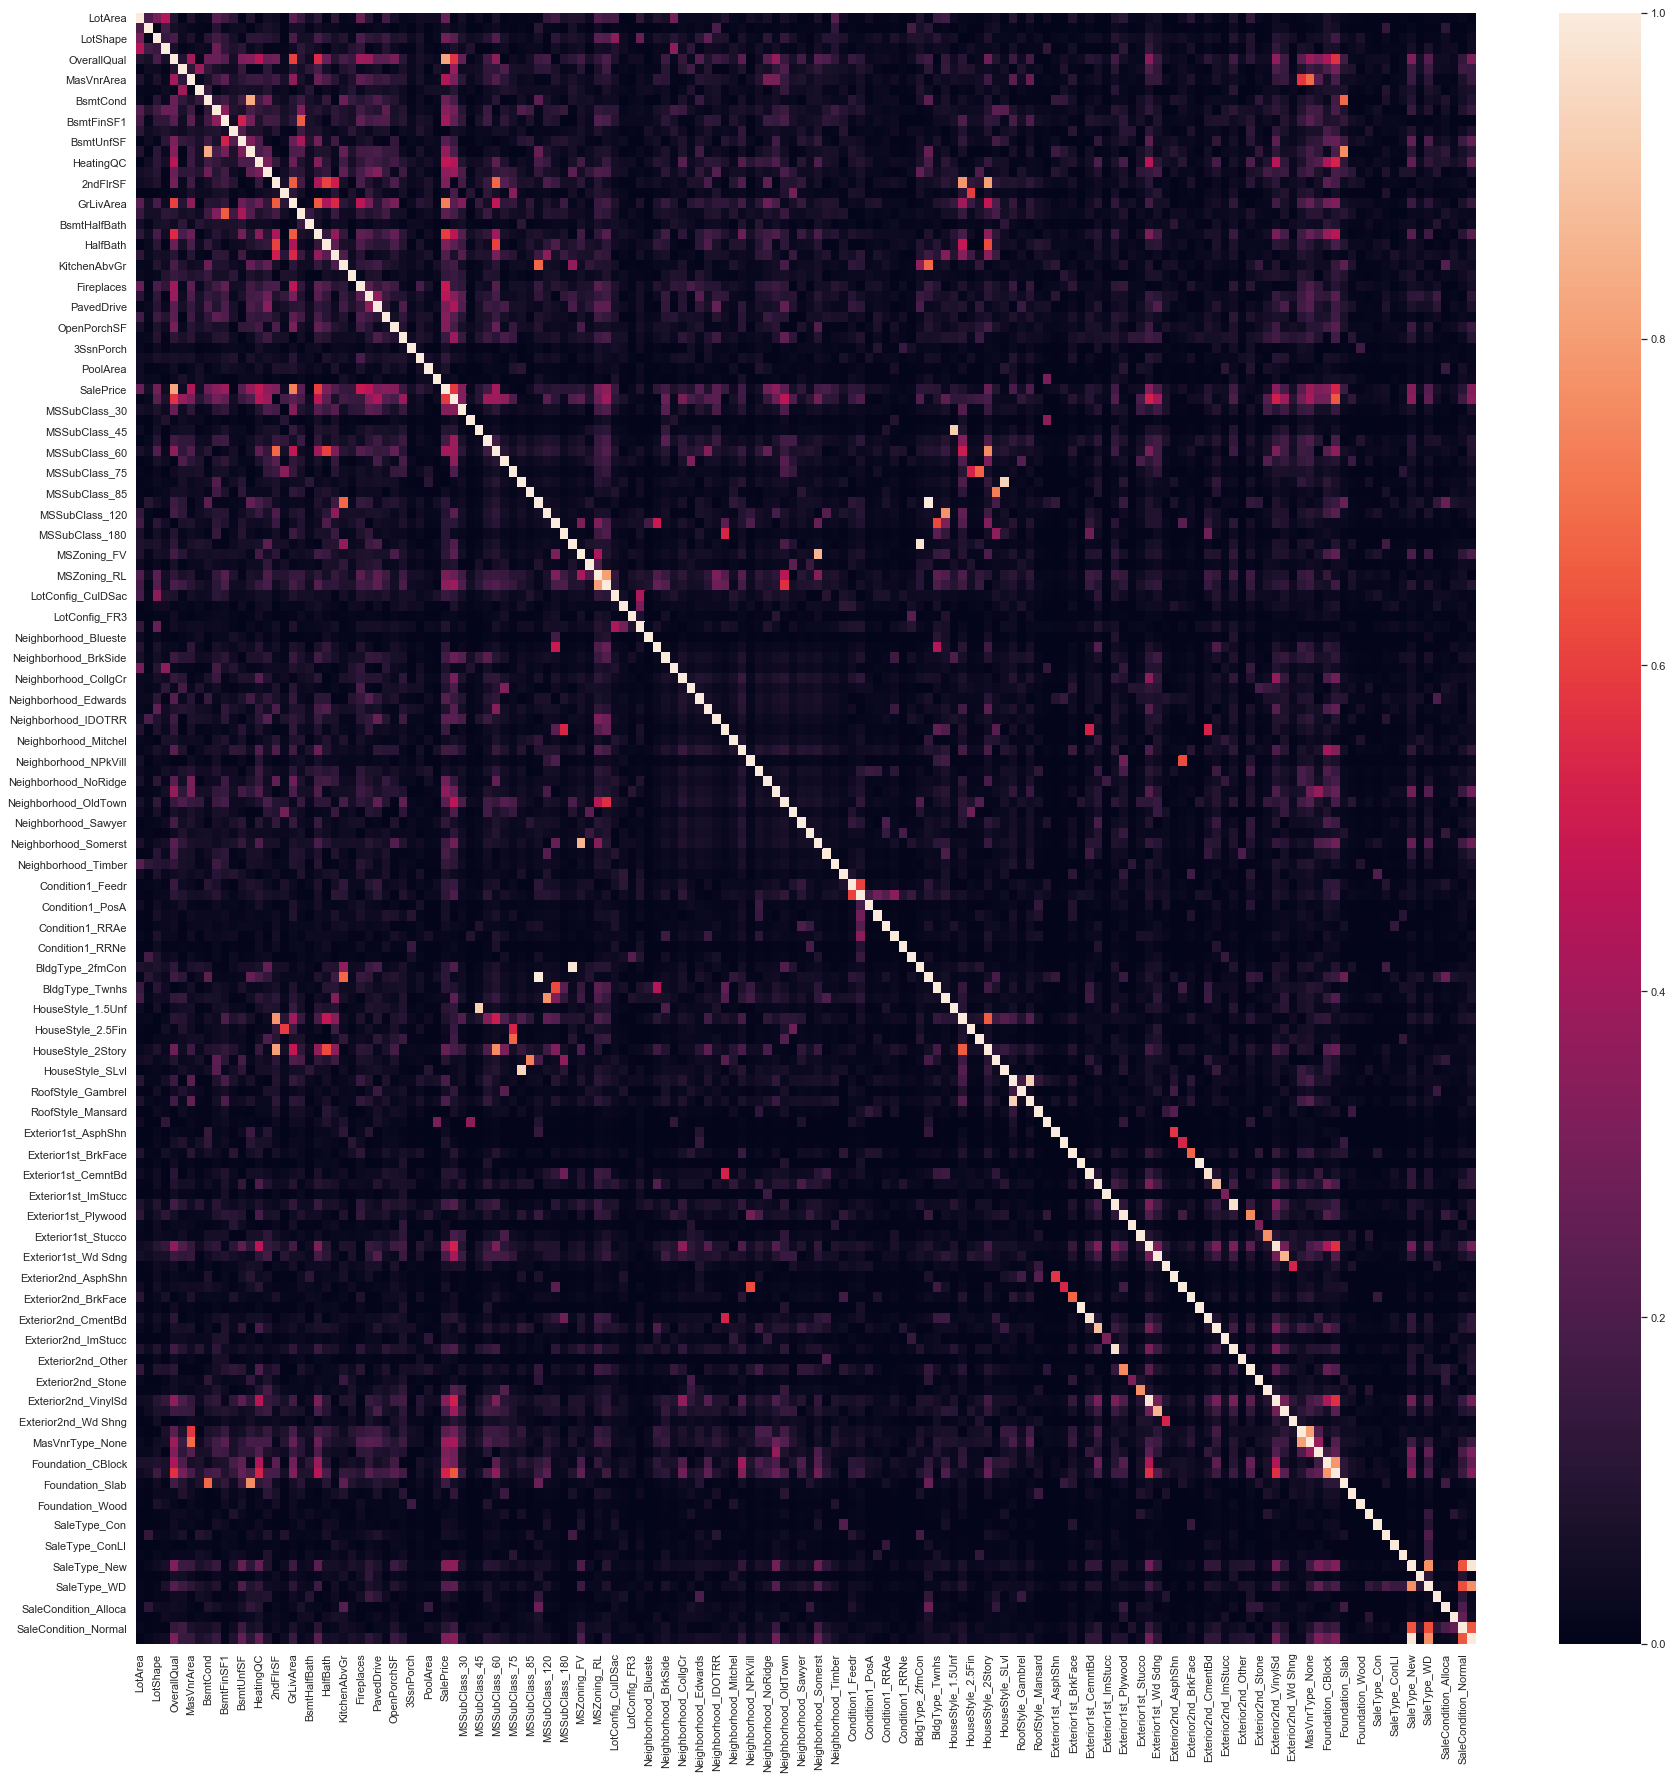

In [96]:
corr = final_df.corr()
corr = corr.apply(lambda x:abs(x))
plt.figure(figsize=(30,30))
sns.heatmap(corr)
plt.show()

# Model Selection

In [97]:
X = final_df.drop('SalePrice',axis =1)
y = final_df.SalePrice

In [98]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=28)

# RFE

#### I performed RFE using grid search to find the optimal number of features. The below code takes a minute or two to run, therefore i am also attaching the figureof the graph that i got from my execution. After performing the Grid search i have deicied to take 35 variables in RFE, since after that i couldnt see any substantial gain in the score with increase in number of variables
### Note:
### **You can run the below two cells by changing them to code cell. I have made them markdown cells as it takes couple of minutes to run**

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
hyper_params = [{'n_features_to_select': list(range(1,100))}]
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,n_jobs = -1)      
model_cv.fit(X_train, y_train)                  

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results



# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results[cv_results['param_n_features_to_select']<=45]["param_n_features_to_select"], cv_results[cv_results['param_n_features_to_select']<=45]["mean_test_score"])
plt.plot(cv_results[cv_results['param_n_features_to_select']<=45]["param_n_features_to_select"], cv_results[cv_results['param_n_features_to_select']<=45]["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

<img src="final.png">

In [101]:
lm = LinearRegression()
rfe = RFE(lm,35)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=35, step=1, verbose=0)

In [102]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotArea', False, 15),
 ('Street', False, 80),
 ('LotShape', False, 123),
 ('LandSlope', False, 101),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 60),
 ('ExterCond', False, 117),
 ('BsmtCond', False, 122),
 ('BsmtExposure', False, 24),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 12),
 ('BsmtUnfSF', False, 8),
 ('TotalBsmtSF', False, 91),
 ('HeatingQC', False, 18),
 ('CentralAir', False, 57),
 ('2ndFlrSF', False, 28),
 ('LowQualFinSF', False, 42),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 64),
 ('BsmtHalfBath', False, 116),
 ('FullBath', False, 45),
 ('HalfBath', False, 43),
 ('BedroomAbvGr', False, 95),
 ('KitchenAbvGr', False, 29),
 ('Functional', False, 20),
 ('Fireplaces', False, 40),
 ('GarageArea', False, 16),
 ('PavedDrive', False, 97),
 ('WoodDeckSF', False, 77),
 ('OpenPorchSF', False, 59),
 ('EnclosedPorch', False, 86),
 ('3SsnPorch', False, 110),
 ('ScreenPorch', False, 73),
 ('PoolArea', False, 99),
 ('MiscVal', False, 113),
 (

In [103]:
cols = X_train.columns[rfe.support_]

In [104]:
cols

Index(['OverallQual', 'OverallCond', 'BsmtFinSF1', 'GrLivArea', 'Age',
       'MSSubClass_75', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160',
       'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotConfig_CulDSac', 'Neighborhood_Blueste',
       'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Condition1_RRAe',
       'BldgType_Duplex', 'RoofStyle_Gambrel', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_ImStucc', 'Exterior2nd_Stone', 'Foundation_Stone',
       'Foundation_Wood', 'SaleType_ConLD', 'SaleType_New',
       'SaleCondition_Normal'],
      dtype='object')

# Model Building and Evaluation

In [105]:
X_train_final = X_train[cols]

In [106]:
# list of alphas to tune
params = {'alpha': [ 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge(random_state = 28)

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_final, y_train) 

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    2.7s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=28, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [107]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.008342,0.009041,0.001961,0.000367,0.001,{'alpha': 0.001},-0.214868,-0.233052,-0.240729,-0.221963,-0.218759,-0.257186,-0.260927,-0.254635,-0.232350,-0.203581,-0.233791,0.018437,22,-0.223438,-0.221943,-0.221265,-0.222234,-0.223683,-0.219268,-0.218753,-0.220444,-0.221413,-0.226256,-0.221870,0.002103
1,0.005093,0.002344,0.002252,0.001299,0.01,{'alpha': 0.01},-0.214822,-0.233062,-0.240847,-0.221962,-0.218765,-0.256994,-0.260880,-0.254490,-0.232269,-0.203646,-0.233760,0.018388,21,-0.223446,-0.221962,-0.221272,-0.222258,-0.223705,-0.219281,-0.218769,-0.220461,-0.221433,-0.226272,-0.221886,0.002103
2,0.007531,0.007043,0.003092,0.001965,0.05,{'alpha': 0.05},-0.214641,-0.233102,-0.241337,-0.221958,-0.218790,-0.256188,-0.260677,-0.253880,-0.232126,-0.203921,-0.233648,0.018182,20,-0.223495,-0.222048,-0.221307,-0.222366,-0.223804,-0.219350,-0.218848,-0.220535,-0.221520,-0.226339,-0.221961,0.002104
3,0.008294,0.005449,0.002836,0.001895,0.1,{'alpha': 0.1},-0.214439,-0.233143,-0.241875,-0.221955,-0.218818,-0.255271,-0.260441,-0.253184,-0.231985,-0.204236,-0.233521,0.017951,19,-0.223576,-0.222150,-0.221349,-0.222488,-0.223917,-0.219451,-0.218952,-0.220666,-0.221629,-0.226432,-0.222061,0.002101
4,0.006586,0.003979,0.002359,0.002029,0.2,{'alpha': 0.2},-0.214076,-0.233199,-0.242756,-0.221961,-0.218865,-0.253681,-0.260020,-0.251979,-0.231751,-0.204779,-0.233294,0.017563,18,-0.223737,-0.222335,-0.221457,-0.222705,-0.224121,-0.219641,-0.219156,-0.220921,-0.221903,-0.226609,-0.222258,0.002093


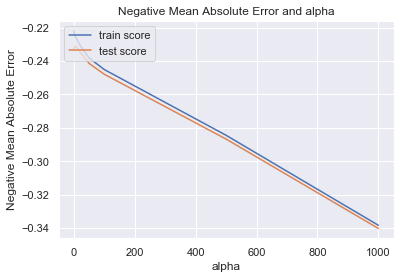

In [108]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [109]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=10]
cv_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.008342,0.009041,0.001961,0.000367,0.001,{'alpha': 0.001},-0.214868,-0.233052,-0.240729,-0.221963,-0.218759,-0.257186,-0.260927,-0.254635,-0.232350,-0.203581,-0.233791,0.018437,22,-0.223438,-0.221943,-0.221265,-0.222234,-0.223683,-0.219268,-0.218753,-0.220444,-0.221413,-0.226256,-0.221870,0.002103
1,0.005093,0.002344,0.002252,0.001299,0.01,{'alpha': 0.01},-0.214822,-0.233062,-0.240847,-0.221962,-0.218765,-0.256994,-0.260880,-0.254490,-0.232269,-0.203646,-0.233760,0.018388,21,-0.223446,-0.221962,-0.221272,-0.222258,-0.223705,-0.219281,-0.218769,-0.220461,-0.221433,-0.226272,-0.221886,0.002103
2,0.007531,0.007043,0.003092,0.001965,0.05,{'alpha': 0.05},-0.214641,-0.233102,-0.241337,-0.221958,-0.218790,-0.256188,-0.260677,-0.253880,-0.232126,-0.203921,-0.233648,0.018182,20,-0.223495,-0.222048,-0.221307,-0.222366,-0.223804,-0.219350,-0.218848,-0.220535,-0.221520,-0.226339,-0.221961,0.002104
3,0.008294,0.005449,0.002836,0.001895,0.1,{'alpha': 0.1},-0.214439,-0.233143,-0.241875,-0.221955,-0.218818,-0.255271,-0.260441,-0.253184,-0.231985,-0.204236,-0.233521,0.017951,19,-0.223576,-0.222150,-0.221349,-0.222488,-0.223917,-0.219451,-0.218952,-0.220666,-0.221629,-0.226432,-0.222061,0.002101
4,0.006586,0.003979,0.002359,0.002029,0.2,{'alpha': 0.2},-0.214076,-0.233199,-0.242756,-0.221961,-0.218865,-0.253681,-0.260020,-0.251979,-0.231751,-0.204779,-0.233294,0.017563,18,-0.223737,-0.222335,-0.221457,-0.222705,-0.224121,-0.219641,-0.219156,-0.220921,-0.221903,-0.226609,-0.222258,0.002093


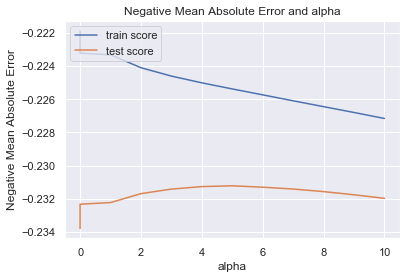

In [110]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [111]:
cv_results.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
16,0.004572,0.000611,0.001724,0.000235,5,{'alpha': 5.0},-0.211958,-0.231430,-0.245064,-0.227823,-0.219552,-0.237916,-0.255653,-0.243622,-0.231444,-0.207858,-0.231220,0.014310,1,-0.227586,-0.225129,-0.223852,-0.225462,-0.226740,-0.223780,-0.222700,-0.223728,-0.225535,-0.229277,-0.225379,0.001918
15,0.005831,0.002838,0.002129,0.000851,4,{'alpha': 4.0},-0.211803,-0.231821,-0.245556,-0.226860,-0.219100,-0.239042,-0.255882,-0.243715,-0.231135,-0.207885,-0.231268,0.014543,2,-0.227111,-0.224781,-0.223500,-0.225154,-0.226458,-0.223336,-0.222251,-0.223434,-0.225126,-0.228960,-0.225011,0.001933
17,0.004745,0.001649,0.001875,0.000553,6,{'alpha': 6.0},-0.212120,-0.231061,-0.244782,-0.228714,-0.219964,-0.237375,-0.255499,-0.243773,-0.232030,-0.207842,-0.231304,0.014176,3,-0.228021,-0.225466,-0.224202,-0.225775,-0.227021,-0.224194,-0.223121,-0.224038,-0.225902,-0.229622,-0.225736,0.001911
18,0.008670,0.009446,0.004618,0.006564,7,{'alpha': 7.0},-0.212343,-0.230716,-0.244518,-0.229574,-0.220346,-0.236980,-0.255395,-0.243981,-0.232610,-0.207813,-0.231416,0.014071,4,-0.228463,-0.225847,-0.224536,-0.226084,-0.227329,-0.224608,-0.223516,-0.224325,-0.226259,-0.229978,-0.226095,0.001916
14,0.006260,0.003052,0.002535,0.000994,3,{'alpha': 3.0},-0.211670,-0.232230,-0.246157,-0.225752,-0.218746,-0.240568,-0.256234,-0.244047,-0.231018,-0.207891,-0.231420,0.014864,5,-0.226565,-0.224382,-0.223132,-0.224816,-0.226159,-0.222854,-0.221794,-0.223124,-0.224629,-0.228593,-0.224605,0.001939


In [112]:
alpha = 5
ridge = Ridge(alpha=alpha,random_state = 28)

ridge.fit(X_train_final, y_train)
ridge.coef_

array([ 0.30373333,  0.14169486,  0.18335404,  0.41952826, -0.2718099 ,
        0.05896321, -0.12877815, -0.01724556, -0.40067712, -0.09182202,
        0.26422278,  0.12521038,  0.21302634,  0.01483235,  0.12247999,
        0.03885517,  0.15596821,  0.24268942, -0.02766321,  0.16178968,
        0.21729288, -0.24126556, -0.12877815, -0.10788707, -0.10855093,
       -0.18121195,  0.18878618, -0.03131535, -0.03417332,  0.09454325,
        0.04670354, -0.09820714,  0.01244353,  0.35163761,  0.15442979])

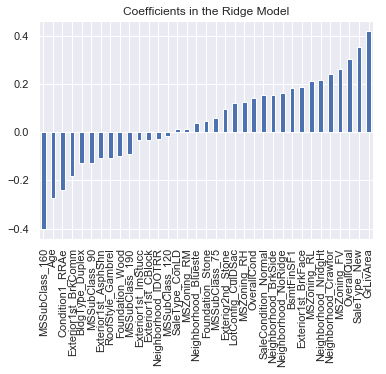

In [113]:
# Plot important coefficients

ridge_coefs = pd.Series(ridge.coef_, index = X_train_final.columns)

ridge_coefs.sort_values().plot(kind = "bar")
plt.title("Coefficients in the Ridge Model")

plt.show()

### Train score

In [114]:
print('R2:')
print(ridge.score(X_train_final,y_train))
print('Adj R2:')
print(1-((1-ridge.score(X_train_final,y_train))*(len(y_train)-1)/(len(y_train)-1-35)))

R2:
0.9036193899279709
Adj R2:
0.9006341497929965


### Test score

In [115]:
print(ridge.score(X_test[cols],y_test))

0.8740236791299814


We can see that train and test score are closer and the R2 score of the model is 0.9044 and test score is 0.88

# Lasso

In [116]:
X_train_final = X_train[cols]

In [117]:
lasso = Lasso(random_state = 28)
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)

params = {'alpha': [0.0001,0.001,0.002,0.003,0.005, 0.01,0.05, 0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0
                    , 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_final, y_train) 

Fitting 10 folds for each of 31 candidates, totalling 310 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:    2.6s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=28,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.002, 0.003, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [118]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=0.01]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.018255,0.005829,0.001971,0.000313,0.0001,{'alpha': 0.0001},-0.231604,-0.186412,-0.221296,-0.261083,-0.235370,-0.235106,-0.241760,-0.229543,-0.238580,-0.255460,-0.233595,0.019329,2,-0.222481,-0.227523,-0.224242,-0.219765,-0.221021,-0.222428,-0.221479,-0.222429,-0.221616,-0.219977,-0.222296,0.002138
1,0.006618,0.002924,0.003669,0.005384,0.001,{'alpha': 0.001},-0.238213,-0.190901,-0.218023,-0.254960,-0.236131,-0.228311,-0.246823,-0.223791,-0.236094,-0.250136,-0.232315,0.017658,1,-0.224439,-0.230170,-0.227907,-0.223086,-0.223795,-0.226635,-0.224175,-0.225886,-0.224860,-0.223122,-0.225407,0.002160
2,0.019430,0.006411,0.004450,0.005055,0.002,{'alpha': 0.002},-0.239409,-0.196391,-0.223072,-0.250809,-0.237902,-0.230424,-0.250055,-0.224119,-0.237992,-0.247427,-0.233739,0.015583,3,-0.226670,-0.232387,-0.229978,-0.225991,-0.226220,-0.228828,-0.225739,-0.228773,-0.227421,-0.225371,-0.227738,0.002123
3,0.006233,0.001397,0.002040,0.000306,0.003,{'alpha': 0.003},-0.242969,-0.199278,-0.231640,-0.250830,-0.240208,-0.234464,-0.253261,-0.230203,-0.242030,-0.246425,-0.237111,0.014572,4,-0.230648,-0.235973,-0.233389,-0.230453,-0.230342,-0.232606,-0.229310,-0.232782,-0.231579,-0.229241,-0.231632,0.001983
4,0.011160,0.005954,0.002604,0.000797,0.005,{'alpha': 0.005},-0.249016,-0.207445,-0.247860,-0.253745,-0.245420,-0.237374,-0.259062,-0.241128,-0.249981,-0.252188,-0.244300,0.013630,5,-0.238568,-0.242950,-0.240650,-0.238596,-0.238664,-0.241474,-0.238260,-0.239964,-0.239466,-0.236563,-0.239515,0.001729


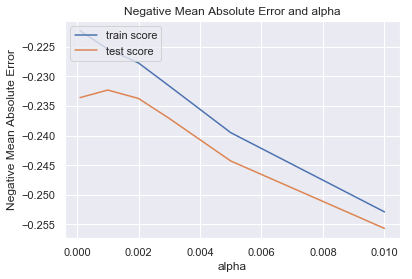

In [119]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [120]:
cv_results.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
1,0.006618,0.002924,0.003669,0.005384,0.0010,{'alpha': 0.001},-0.238213,-0.190901,-0.218023,-0.254960,-0.236131,-0.228311,-0.246823,-0.223791,-0.236094,-0.250136,-0.232315,0.017658,1,-0.224439,-0.230170,-0.227907,-0.223086,-0.223795,-0.226635,-0.224175,-0.225886,-0.224860,-0.223122,-0.225407,0.002160
0,0.018255,0.005829,0.001971,0.000313,0.0001,{'alpha': 0.0001},-0.231604,-0.186412,-0.221296,-0.261083,-0.235370,-0.235106,-0.241760,-0.229543,-0.238580,-0.255460,-0.233595,0.019329,2,-0.222481,-0.227523,-0.224242,-0.219765,-0.221021,-0.222428,-0.221479,-0.222429,-0.221616,-0.219977,-0.222296,0.002138
2,0.019430,0.006411,0.004450,0.005055,0.0020,{'alpha': 0.002},-0.239409,-0.196391,-0.223072,-0.250809,-0.237902,-0.230424,-0.250055,-0.224119,-0.237992,-0.247427,-0.233739,0.015583,3,-0.226670,-0.232387,-0.229978,-0.225991,-0.226220,-0.228828,-0.225739,-0.228773,-0.227421,-0.225371,-0.227738,0.002123
3,0.006233,0.001397,0.002040,0.000306,0.0030,{'alpha': 0.003},-0.242969,-0.199278,-0.231640,-0.250830,-0.240208,-0.234464,-0.253261,-0.230203,-0.242030,-0.246425,-0.237111,0.014572,4,-0.230648,-0.235973,-0.233389,-0.230453,-0.230342,-0.232606,-0.229310,-0.232782,-0.231579,-0.229241,-0.231632,0.001983
4,0.011160,0.005954,0.002604,0.000797,0.0050,{'alpha': 0.005},-0.249016,-0.207445,-0.247860,-0.253745,-0.245420,-0.237374,-0.259062,-0.241128,-0.249981,-0.252188,-0.244300,0.013630,5,-0.238568,-0.242950,-0.240650,-0.238596,-0.238664,-0.241474,-0.238260,-0.239964,-0.239466,-0.236563,-0.239515,0.001729


In [121]:
alpha =0.001

lasso = Lasso(alpha=alpha,random_state = 28)
        
lasso.fit(X_train_final, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=28,
   selection='cyclic', tol=0.0001, warm_start=False)

In [122]:
(lasso.coef_)

array([ 3.05080395e-01,  1.42522802e-01,  1.83054381e-01,  4.21819800e-01,
       -2.71088492e-01,  0.00000000e+00, -2.42272411e-01, -0.00000000e+00,
       -4.15672345e-01, -5.99133833e-02,  2.52767555e-01,  5.36004670e-02,
        1.96596508e-01, -0.00000000e+00,  1.15638544e-01,  0.00000000e+00,
        1.45920815e-01,  2.50371456e-01, -0.00000000e+00,  1.48722881e-01,
        2.08925874e-01, -2.45532592e-01, -1.42178337e-05, -3.37486489e-02,
       -0.00000000e+00, -4.46786899e-02,  1.79650229e-01, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  3.58954539e-01,  1.55865015e-01])

In [123]:
list(zip(X_train_final.columns,lasso.coef_))

[('OverallQual', 0.30508039530294145),
 ('OverallCond', 0.14252280162305697),
 ('BsmtFinSF1', 0.18305438068014945),
 ('GrLivArea', 0.4218198001950802),
 ('Age', -0.271088491674768),
 ('MSSubClass_75', 0.0),
 ('MSSubClass_90', -0.24227241069470806),
 ('MSSubClass_120', -0.0),
 ('MSSubClass_160', -0.41567234535454217),
 ('MSSubClass_190', -0.059913383315912665),
 ('MSZoning_FV', 0.2527675552418102),
 ('MSZoning_RH', 0.05360046697242424),
 ('MSZoning_RL', 0.19659650839706477),
 ('MSZoning_RM', -0.0),
 ('LotConfig_CulDSac', 0.11563854401271897),
 ('Neighborhood_Blueste', 0.0),
 ('Neighborhood_BrkSide', 0.14592081450081448),
 ('Neighborhood_Crawfor', 0.25037145560199314),
 ('Neighborhood_IDOTRR', -0.0),
 ('Neighborhood_NoRidge', 0.1487228805245458),
 ('Neighborhood_NridgHt', 0.20892587402461013),
 ('Condition1_RRAe', -0.24553259173082195),
 ('BldgType_Duplex', -1.4217833735354494e-05),
 ('RoofStyle_Gambrel', -0.03374864885519589),
 ('Exterior1st_AsphShn', -0.0),
 ('Exterior1st_BrkComm', -0.

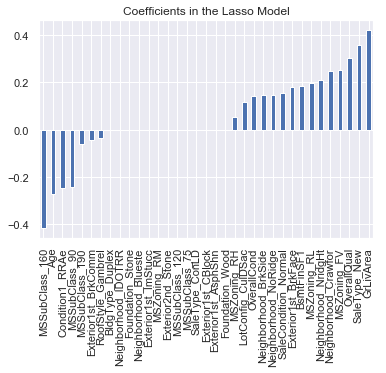

In [124]:
# Plot important coefficients

lasso_coefs = pd.Series(lasso.coef_, index = X_train_final.columns)


lasso_coefs.sort_values().plot(kind = "bar")
plt.title("Coefficients in the Lasso Model")

plt.show()

In [125]:
# Number of variables in Lasso
i = 0
for x in lasso.coef_:
    if x != 0 :
        i = i+1
print(i)

23


### Train score

In [126]:
print(lasso.score(X_train_final,y_train))
print('Adj R2:')
print(1-((1-lasso.score(X_train_final,y_train))*(len(y_train)-1)/(len(y_train)-1-22)))

0.9025617806532188
Adj R2:
0.9006863293622046


### Test score

In [127]:
print(lasso.score(X_test[cols],y_test))

0.8735403601249788


We can see that train and test score are closer and the R2 score of the model is 0.90256 and test score is 0.873

### Final variables and their coefficients for ridge and Lasso

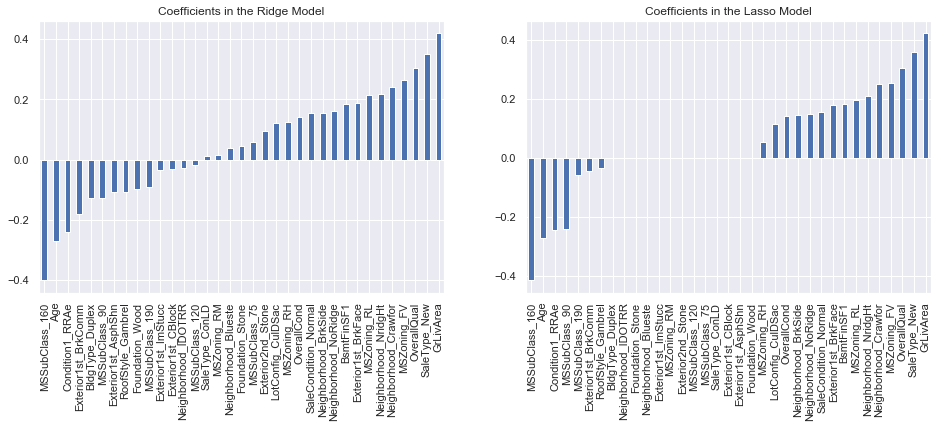

In [128]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
ridge_coefs.sort_values().plot(kind = "bar")
plt.title("Coefficients in the Ridge Model")
plt.subplot(1,2,2)
lasso_coefs.sort_values().plot(kind = "bar")
plt.title("Coefficients in the Lasso Model")
plt.show()

- I have decided to go with Lasso regression because the R2 score for both lasso and rigde were similar but the lasso regression only has 22 variables whereas ridge has all 25 variables. Since the accuracy is similat i have decided to go with simpler model which is lasso
- `GrLivArea` is the variable which is most positively related to the Saleprice. this is same ss per intution that the houses with the larger area will have higher price
- New houses have higher prices when compared to the old one, this is reflected by both `SaleType_New` which is positively related and `Age` of the house which is negatively correlated to the `SalePrice`
- `Overall` quality of the house is also an important variable which has positive effect on `SalePrice`
- `Neighborhood` is also an important variable with houses in certain neighborhoods like Crawfor,nridgHt,BrkSide,NoRidge effect the price of house positively 
- `MSZoning_RL` has a significant positive impact on the `SalePrice` of the house
- `Overall Condition` also has a positive impact on the `SalePrice`

### Lasso equation

In [129]:
newdf = lasso_coefs.reset_index()

In [130]:
newdf = newdf[round(newdf[0],2) != 0]

In [131]:
newdf = newdf.reindex(newdf[0].abs().sort_values(ascending = False).index)

In [132]:
newdf

,index,0
3,GrLivArea,0.421820
8,MSSubClass_160,-0.415672
33,SaleType_New,0.358955
0,OverallQual,0.305080
4,Age,-0.271088
10,MSZoning_FV,0.252768
17,Neighborhood_Crawfor,0.250371
21,Condition1_RRAe,-0.245533
6,MSSubClass_90,-0.242272
20,Neighborhood_NridgHt,0.208926


In [133]:
def equation_out(x):
    return(str(round(x[0],2))+' x '+ str(x['index']))

In [134]:
equation= 'saleprice = '
i = 0
for x in newdf.apply(equation_out,axis =1).tolist():
    if i == 0:
        equation = equation+x
    else :
        equation = equation+' + '+x
    i = i+1

In [135]:
print('Lasso regression equation for SalePrice:\n')
print(equation)

Lasso regression equation for SalePrice:

saleprice = 0.42 x GrLivArea + -0.42 x MSSubClass_160 + 0.36 x SaleType_New + 0.31 x OverallQual + -0.27 x Age + 0.25 x MSZoning_FV + 0.25 x Neighborhood_Crawfor + -0.25 x Condition1_RRAe + -0.24 x MSSubClass_90 + 0.21 x Neighborhood_NridgHt + 0.2 x MSZoning_RL + 0.18 x BsmtFinSF1 + 0.18 x Exterior1st_BrkFace + 0.16 x SaleCondition_Normal + 0.15 x Neighborhood_NoRidge + 0.15 x Neighborhood_BrkSide + 0.14 x OverallCond + 0.12 x LotConfig_CulDSac + -0.06 x MSSubClass_190 + 0.05 x MSZoning_RH + -0.04 x Exterior1st_BrkComm + -0.03 x RoofStyle_Gambrel


In [136]:
print('number of features in lasso:')
print(len(newdf))

number of features in lasso:
22


Variables that effect the SalePrice most with their coefficients (Top 10) :
- MSSubClass_160 - (-0.42) (negative impact)
- GrLivArea - (0.42) (positive impact)
- SaleType_New - (0.36) (positive impact)
- OverallQual - (0.31) (positive impact)
- Age - (-0.27) (negative impact)
- MSZoning_FV - (0.25) (positive impact)
- Neighborhood_Crawfor - (0.25) (positive impact)
- Condition1_RRAe - (-0.24) (negative impact)
- MSSubClass_90 - (-0.24) (negative impact)
- Neighborhood_NoRidge - (0.21) (positive impact)